## Descarga ERA5

En este notebook vamos a descargar datos del dataset ERA5, un [reanálisis](https://climate.copernicus.eu/sites/default/files/2020-01/2019.11.21_ECMWF%20Reanalysis%20video_with%20caption_v4_IOB.mp4) producido por el European Centre for Medium-Range Weather Forecasts. Este reanalisis es ampliamente utilizado por la comunidad oceanográfica ya que reemplaza a ERA-Interim que fue recientemente discontinuado. Acá vamos a ver una forma simple, espero, de descargar campos de ERA5.

Primero veamos algunas características de la familia de reanálisis de ERA5:
- ERA5 Se encuentra disponible desde 1979 hasta el presente (NRT "near real time"). 
- Existe una versión preliminar que cubre desde 1950 hasta 1978. Se espera que próximamente haya datasets unificados que cubran de 1950 al presente.
- ERA5-Land es otro reanálisis especializado en el estudio de la superficie terrestre, disponible de 1950 al presente y con mayor resolución espacial
<div>
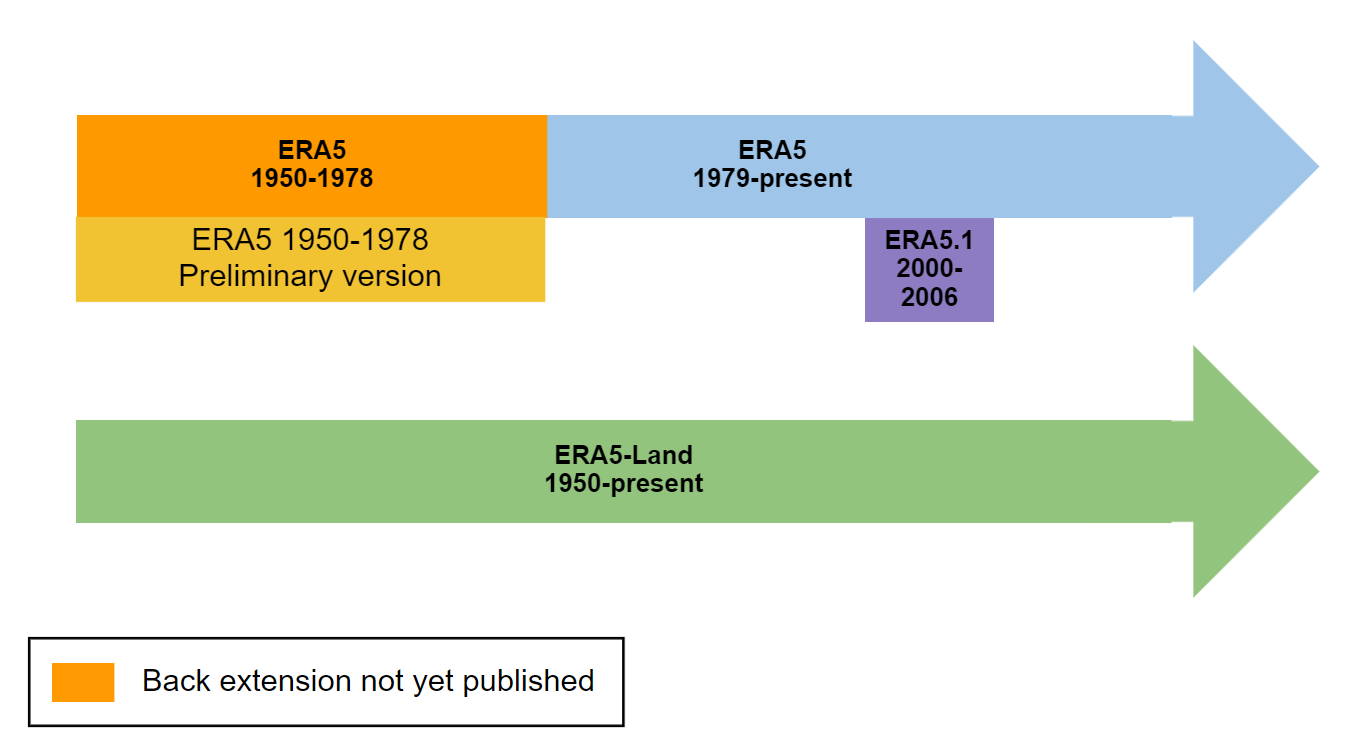
</div>

### Acceso:
Se accede a través del portal de Copernicus, es decir el [C3S Climate Data Store (CDS)](https://cds.climate.copernicus.eu/#!/home). Acá es posible verificar cuales son los productos que el reanálisis de ERA5 ofrece, que vienen distribuidos en:
- Pressure levels: 1000hPa, 900hPa, 800hPa, etc
- Single levels: surface, 2m, 10m, 100m

A su vez, el reanálisis ofrece:
- Datos horarios
- Medias mensuales
- Medias mensuales sinópticas (monthly averaged by hour of day)


### CDS Web Interface
Desde el portal web podemos elegir un tipo de producto de ERA5 y hacer una selección del período de interés, la variable y el área geográfica. 

Debajo del menú hay un botón que nos crea el script de python para hacer la descarga de datos: "Show API Request"

<div>
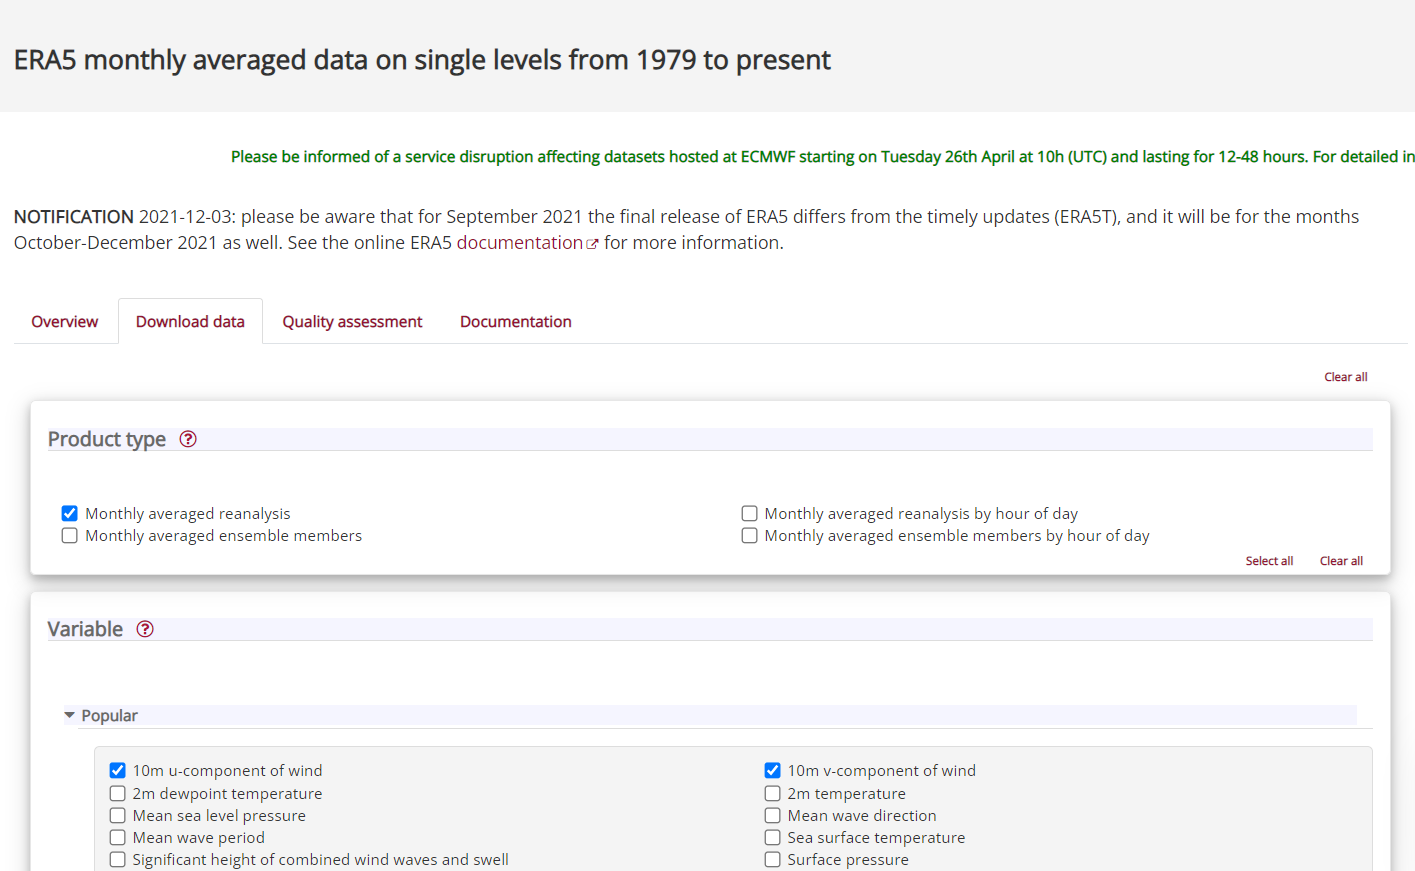
</div>


<div>
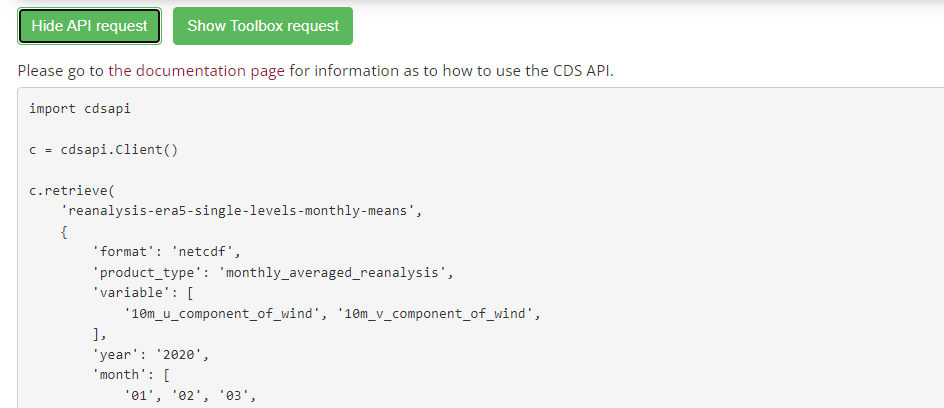
</div>


### Install CDSAPI
Para poder ejecutar correctamente el script de request, es necesario tener installada la libreria cdsapi en python. En mi caso, trabajo en un enviroment de Anaconda, y seguí los siguientes pasos para poder usar la librería

1. En Anaconda prompt ejecuté
```pip3 install cdsapi```

2. Me logueé en [C3S Climate Data Store (CDS)](https://cds.climate.copernicus.eu/#!/home) y busqué mi API key [aquí](https://cds.climate.copernicus.eu/api-how-to). 

3. Copié las dos líneas de url and key en un archivo llamado .cdsapirc localizado en ```C:\Users\Username folder```

### Ejecutar rutina

Ahora sí, para ejecutar la rutina que descarga los datos hay dos opciones:
1. Guardar la rutina en un ```archivo.py``` y luego ejecutarla desde una terminal o 
2. Copiar esta rutina en Ipython o jupyer notebook.

y listo! 

Acá abajo queda la rutina con algunos comments en las líneas:

In [ ]:
#!/usr/bin/env python

import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',    # producto seleccionado
    {
        'format': 'netcdf',   # formato del archivo output
        'product_type': 'monthly_averaged_reanalysis',
        'variable': [
            '10m_u_component_of_wind', '10m_v_component_of_wind',
        ],
        'year': '2020',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': [10, -110, -60, 0,],     # área seleccionada: North, West, South, East.
        'grid': [0.25, 0.25]    # resolución espacial
    },
    'C:/Users/Usuario/Documents/10m_u_v_2020.nc')

#### Para más información
- https://cds.climate.copernicus.eu/#!/home
- https://confluence.ecmwf.int/display/CKB/How+to+download+ERA5
- https://confluence.ecmwf.int/display/CKB/The+family+of+ERA5+datasets?src=contextnavpagetreemode
